# Seascapes Exploratory Analysis

## Key questions to ask
+ how are seascapes distributed over water?
+ what species live in these seascapes?
+ how do these seascpes differ?

## Import modules

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas as gpd
import gc

## Fetch Data

The URL of our resource:
```url
https://upwell.pfeg.noaa.gov/erddap/griddap/noaa_aoml_d89c_8713_c8a0.csv?CLASS%5B(2022-07-20T12:00:00Z):1:(2022-07-20T12:00:00Z)%5D%5B(23.19):1:(27)%5D%5B(6):1:(10)%5D,P%5B(2022-07-20T12:00:00Z):1:(2022-07-20T12:00:00Z)%5D%5B(23.19):1:(27)%5D%5B(6):1:(10)%5D
```
Generated from https://upwell.pfeg.noaa.gov/erddap/griddap/noaa_aoml_d89c_8713_c8a0.html

In [3]:
df = pd.read_csv("https://upwell.pfeg.noaa.gov/erddap/griddap/noaa_aoml_d89c_8713_c8a0.csv?CLASS%5B(2022-07-20T12:00:00Z):1:(2022-07-20T12:00:00Z)%5D%5B(23.19):1:(27)%5D%5B(6):1:(10)%5D,P%5B(2022-07-20T12:00:00Z):1:(2022-07-20T12:00:00Z)%5D%5B(23.19):1:(27)%5D%5B(6):1:(10)%5D")

In [ ]:
df

In [ ]:
df.P.unique()

In [ ]:
df.CLASS[df.CLASS.notna()]

Let us fetch some new dataset.

Fetched from: https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_seascapes_8day.graph?CLASS[(2022-07-20T12:00:00Z)][(23.025):(28.025)][(-83.575):(-78.125)]&.draw=surface&.vars=longitude%7Clatitude%7CCLASS&.colorBar=%7C%7C%7C%7C%7C&.bgColor=0xffccccff

In [2]:
data = pd.read_csv("https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_seascapes_8day.csv?CLASS%5B(2022-07-20T12:00:00Z)%5D%5B(23.025):(28.025)%5D%5B(-83.575):(-78.125)%5D&.draw=surface&.vars=longitude%7Clatitude%7CCLASS&.colorBar=%7C%7C%7C%7C%7C&.bgColor=0xffccccff")
data

,time,latitude,longitude,CLASS
0,UTC,degrees_north,degrees_east,None
1,2022-07-20T12:00:00Z,23.025,-83.575,15
2,2022-07-20T12:00:00Z,23.025,-83.525,15
3,2022-07-20T12:00:00Z,23.025,-83.475,15
4,2022-07-20T12:00:00Z,23.025,-83.425,15
...,...,...,...,...
11106,2022-07-20T12:00:00Z,28.025,-78.325,5
11107,2022-07-20T12:00:00Z,28.025,-78.275,5
11108,2022-07-20T12:00:00Z,28.025,-78.225,15
11109,2022-07-20T12:00:00Z,28.025,-78.175,15


In [5]:
print(f"Percentage of records with NaN CLASS - {len(data[data.CLASS.isna()])/len(data)*100} %")

Percentage of records with NaN CLASS - 52.70452704527045 %


## Seascapes on map

In [4]:
temp = data[(data.CLASS.notna()) & (data.CLASS != "None")]
temp.CLASS = temp.CLASS.astype(int)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


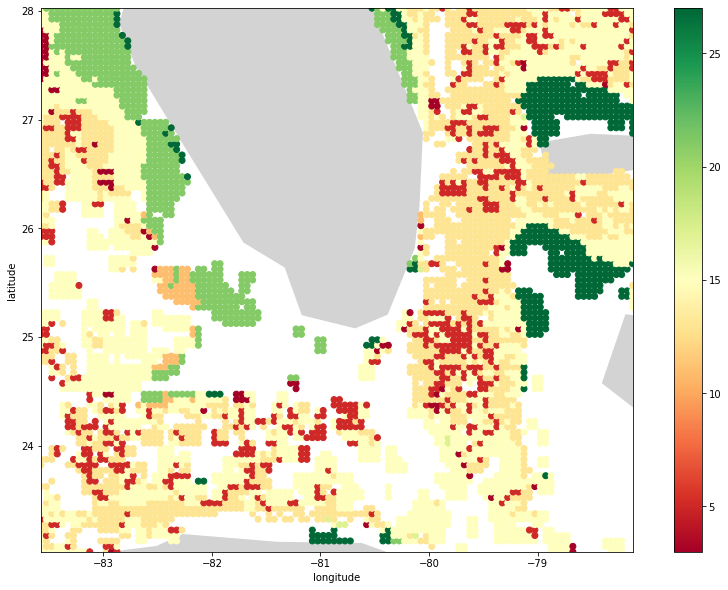

In [35]:
ax2 = countries.plot(color="lightgrey", figsize=(15,10))
ax2.set_xlim(temp.longitude.astype(float).min(), temp.longitude.astype(float).max())
ax2.set_ylim(temp.latitude.astype(float).min(), temp.latitude.astype(float).max())
ax = plt.scatter(
    data = temp[["longitude","latitude", "CLASS"]].astype(float),
    x = "longitude",
    y = "latitude",
    c="CLASS",
    cmap="RdYlGn",
)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(ax);

## Seascapes Taxonomic Distribution

In [36]:
occdf = pd.read_csv("../input/obis-florida-keys-occurrence-records-19972012/florida-keys-1997-2012.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (49,77,79,95,97,99,100,104,105,112,113,115,117,134,149,150,158,159,160,165,166,167,168,169,170,172,173,174,175,177,178,179,181,182,183,184,185,186,188,189,190,191,192,193,194,196) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
!jupyter nbextension enable --py widgetsnbextension
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [38]:
import plotly.graph_objects as go
import plotly.express as px

In [65]:
temp[["longitude","latitude", "CLASS"]] = temp[["longitude","latitude", "CLASS"]].astype(float)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
occdf[["kingdom", "phylum", "class", "order", "family", "genus","species"]] = occdf.loc[:,["kingdom", "phylum", "class", "order", "family", "genus","species"]].fillna("None")

The below code is a little bit time-consuming and compute intensive so, please wait after clicking "Run".

In [84]:
@interact
def select_seascape_class(Class = temp.CLASS.unique()):
    l = []
    for i in temp[temp.CLASS == Class].iterrows():
        l += occdf[(occdf.decimalLongitude.between(i[1].longitude - 0.025, i[1].longitude + 0.025)) & (occdf.decimalLatitude.between(i[1].latitude - 0.025, i[1].latitude + 0.025))].index.tolist()
        # append the index of suitable data 
    fig = px.sunburst(occdf.loc[l,:],
                path=["kingdom", "phylum", "class", "order", "family", "genus","species"],
                width=750, height=750,
                title=f"Seascape Class: {Class} Taxonomic Distribution",
               )
    fig.update_traces(textinfo="label+percent parent")
    fig.show()

interactive(children=(Dropdown(description='clas', options=(15.0, 5.0, 13.0, 3.0, 27.0, 21.0, 17.0, 11.0), val…

In [72]:
gc.collect()

51784